In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as atats
warnings.filterwarnings('ignore')

In [2]:
#Creating database connection
conn= sqlite3.connect('inventory.db')

#Fatching vendor Data
df= pd.read_sql_query("Select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,3960.0,DIAGEO NORTH AMERICA INC,4261.0,Capt Morgan Spiced Rum,22.99,1750.0,93071.0,1504958.07,18666.0,39979.82,410486.34,34297.38,257032.07,-1094471.73,-266.628051,0.200557,0.272756
1,1128.0,BROWN-FORMAN CORP,1233.0,Jack Daniels No 7 Black,36.99,1750.0,50158.0,1317650.66,8879.0,59995.33,319555.21,16313.84,68601.68,-998095.45,-312.338970,0.177021,0.242519
2,4425.0,MARTIGNETTI COMPANIES,3405.0,Tito's Handmade Vodka,28.99,1750.0,55578.0,1288853.82,8641.0,47904.01,258854.59,15876.53,144929.24,-1029999.23,-397.906496,0.155475,0.200841
3,17035.0,PERNOD RICARD USA,8068.0,Absolut 80 Proof,24.99,1750.0,64764.0,1181295.36,10061.0,44328.85,259946.39,18485.44,123780.22,-921348.97,-354.438071,0.155349,0.220052
4,3960.0,DIAGEO NORTH AMERICA INC,3545.0,Ketel One Vodka,29.99,1750.0,49448.0,1082416.72,11435.0,48653.88,344309.65,21010.55,257032.07,-738107.07,-214.373042,0.231253,0.318093


In [3]:
#summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8334.0,10157.436165,17717.434292,2.000000e+00,3664.000000,7153.000000,9552.000000,1.733570e+05
Brand,8334.0,17620.490161,13026.138820,5.800000e+01,5301.250000,17447.000000,24952.750000,9.063100e+04
ActualPrice,8334.0,31.482893,136.042583,4.900000e-01,10.990000,15.990000,26.990000,7.499990e+03
Volume,8334.0,855.237161,619.549909,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,8334.0,1542.023758,4943.946219,1.000000e+00,24.000000,221.500000,1110.750000,1.425780e+05
TotalPurchaseDollars,8334.0,14359.356809,50388.731722,7.100000e-01,342.720000,2688.250000,11579.272500,1.504958e+06
TotalSalesQuantity,8334.0,276.663067,918.823480,0.000000e+00,3.000000,35.000000,200.000000,2.714700e+04
TotalSalesPrice,8334.0,1822.852203,4042.148672,0.000000e+00,27.720000,382.095000,1822.480000,5.999533e+04
TotalSalesDollars,8334.0,3739.205995,12799.323133,0.000000e+00,68.970000,664.150000,3093.250000,4.104863e+05
TotalExciseTax,8334.0,155.206848,885.280538,0.000000e+00,0.440000,6.205000,47.662500,3.429738e+04


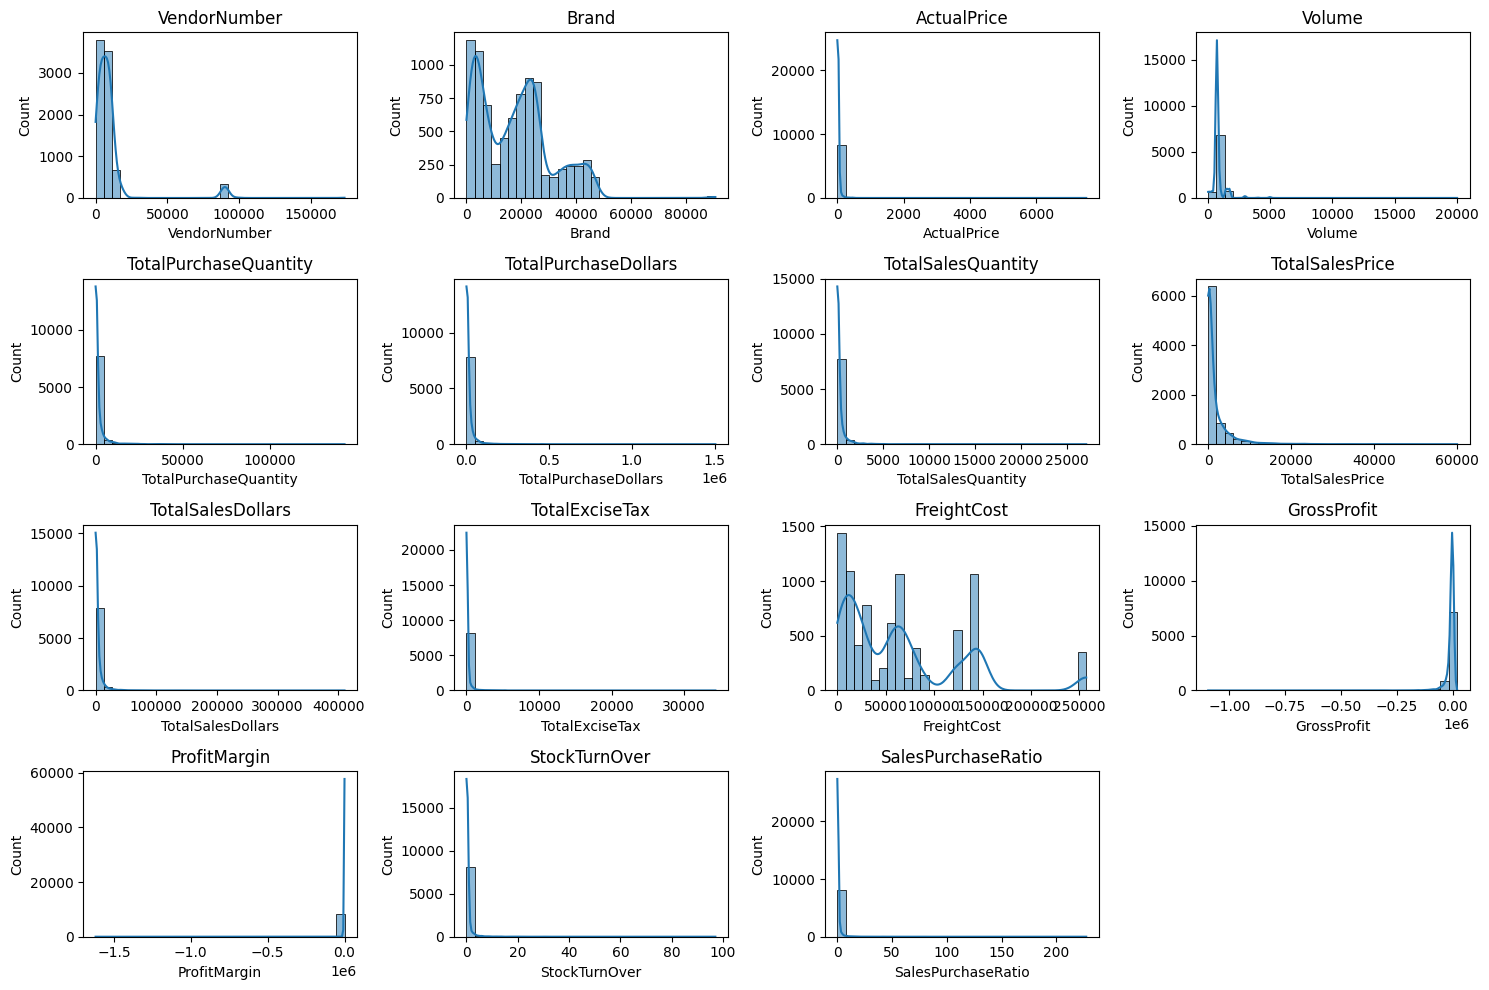

In [4]:
#Dirstibution Plots for Numerical Columns
Numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i , col in enumerate(Numerical_cols):
    plt.subplot(4,4,i+1)  #Adjust grid Layout as needed
    sns.histplot(df[col], kde=True ,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

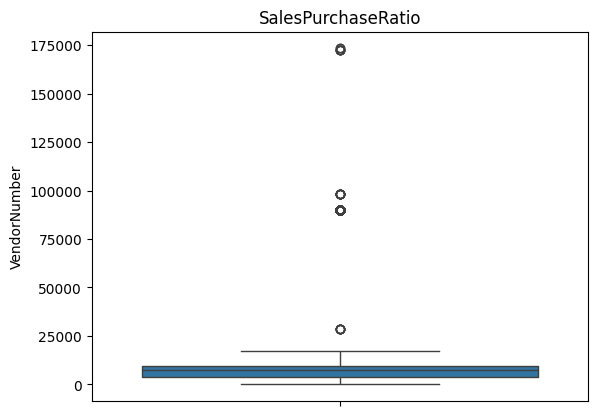

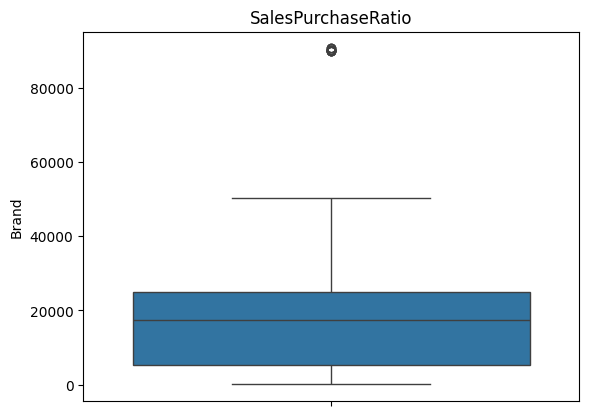

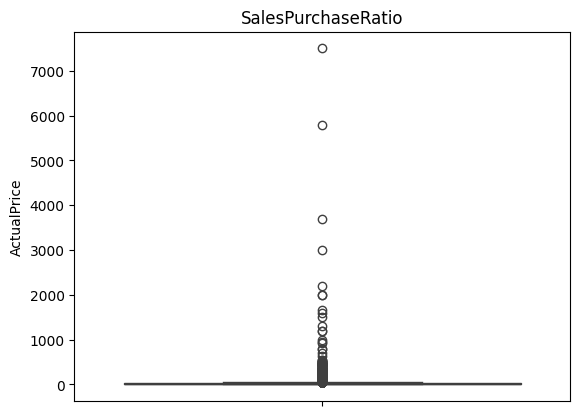

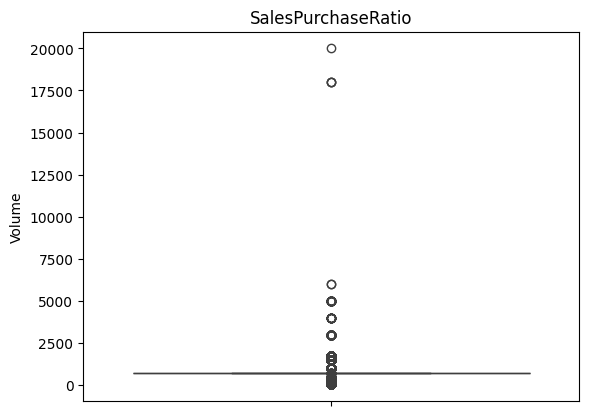

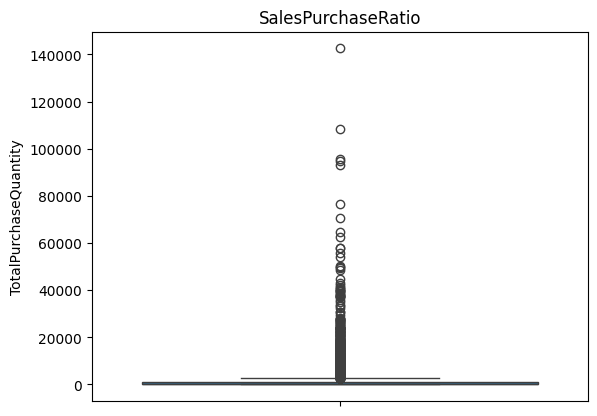

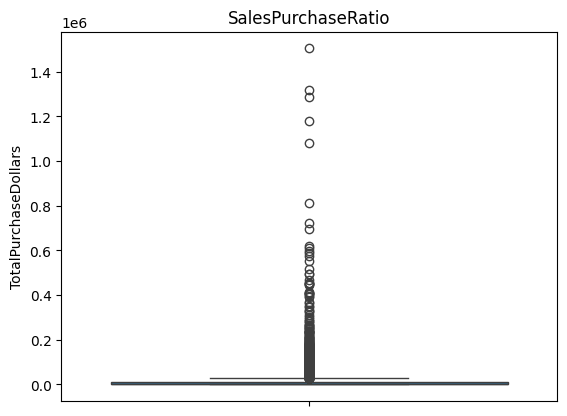

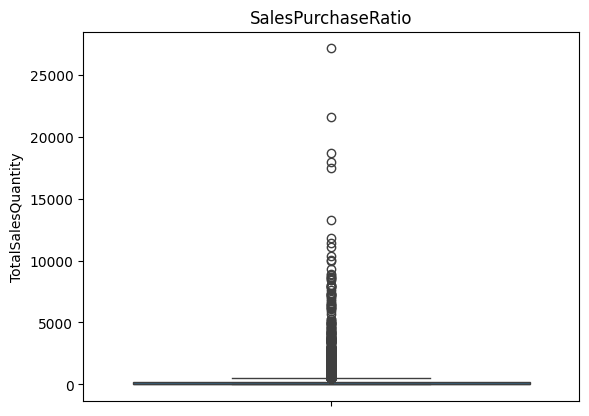

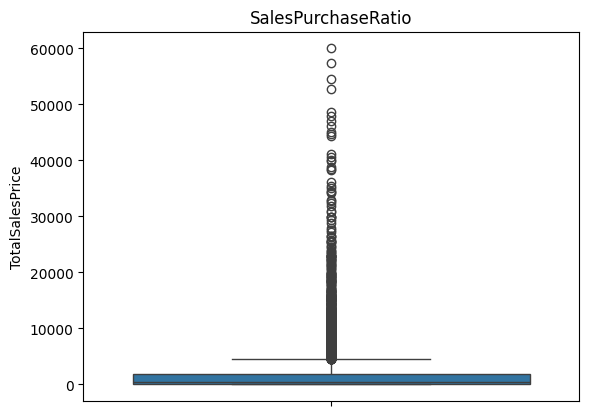

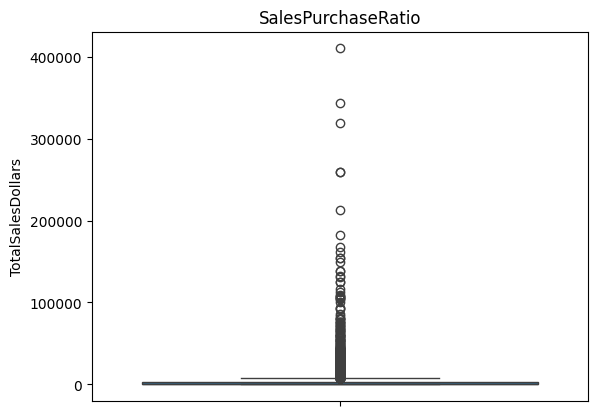

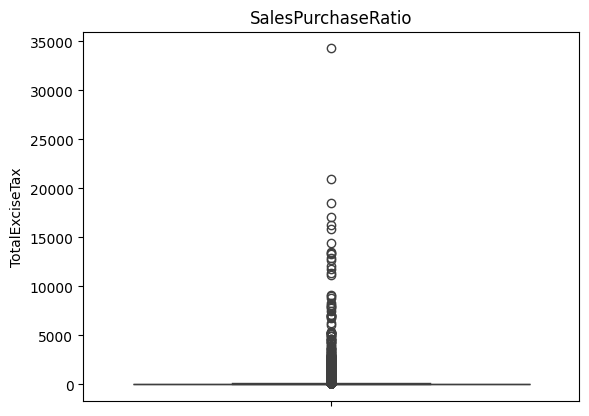

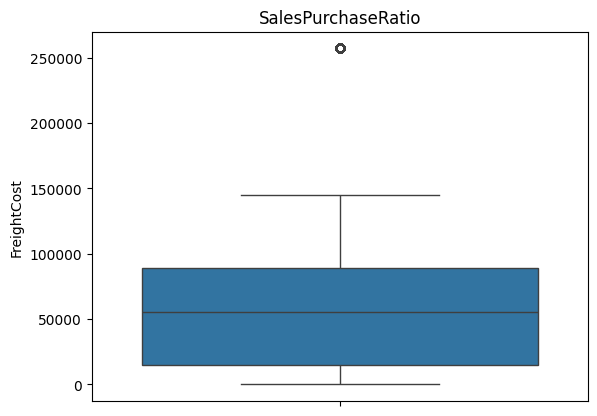

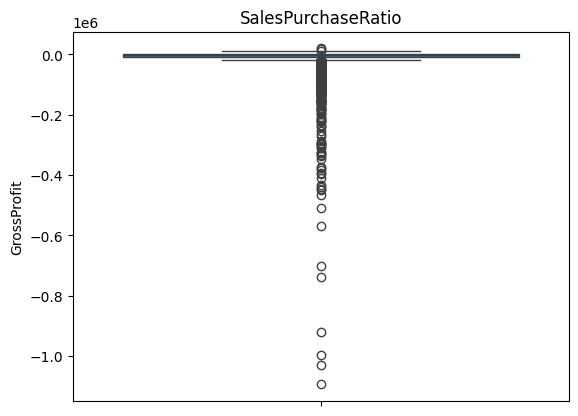

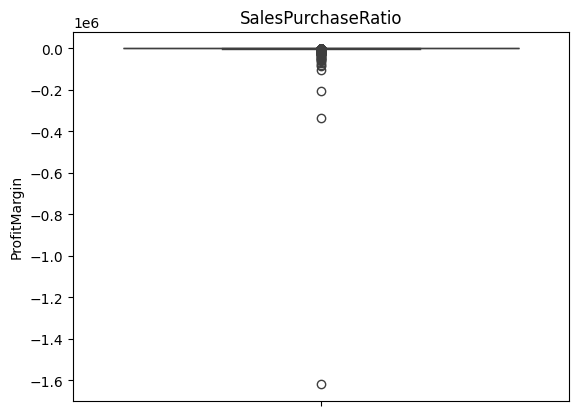

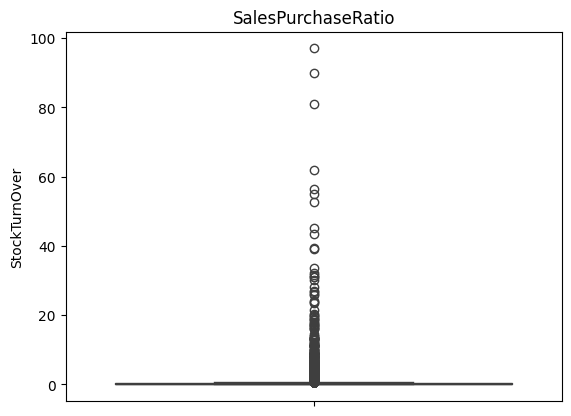

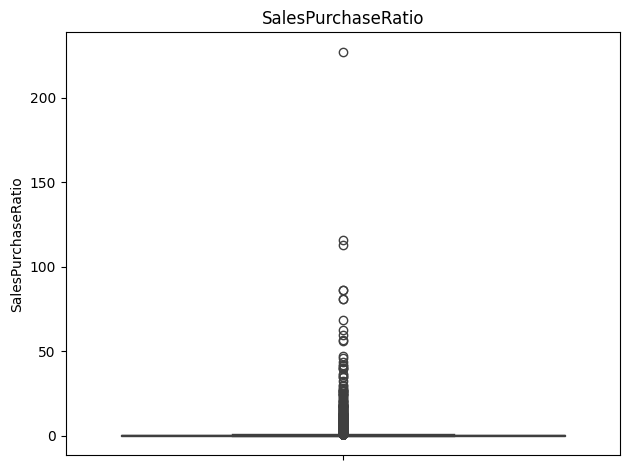

In [5]:
#Outliner Detection with Boxplots
plt.figure(figsize=(15,10))
for i , cols in enumerate(Numerical_cols):
    plt.subplots(1,1)
    sns.boxplot(y=df[cols])
    plt.title(col)
plt.tight_layout()
plt.show()

In [6]:
#Filtering the data
df=pd.read_sql_query(""" SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""",conn)

In [7]:
df

,VendorNumber,VendorName,Brand,Description,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio
0,1392.0,CONSTELLATION BRANDS INC,6650.0,Simi Chard,14.99,750.0,10252.0,75659.76,8445.0,13391.96,93130.55,948.35,79528.99,17470.79,18.759462,0.823742,1.230913
1,4425.0,MARTIGNETTI COMPANIES,6983.0,J Lohr Seven Oaks Cab Svgn,11.99,750.0,6846.0,56616.42,3673.0,14909.67,58659.27,411.54,144929.24,2042.85,3.482570,0.536518,1.036082
2,1392.0,CONSTELLATION BRANDS INC,22143.0,Simi Cab Svgn,18.99,750.0,3666.0,38566.32,2880.0,13565.62,46362.20,322.44,79528.99,7795.88,16.815164,0.785597,1.202142
3,516.0,BANFI PRODUCTS CORP,18152.0,Banfi Centine Mntcln Tscna,10.99,750.0,5521.0,29040.46,3841.0,7363.90,31178.59,430.59,8510.41,2138.13,6.857687,0.695707,1.073626
4,1392.0,CONSTELLATION BRANDS INC,22899.0,Simi Svgn Bl,14.99,750.0,4258.0,27804.74,2965.0,8136.97,29957.35,332.40,79528.99,2152.61,7.185582,0.696336,1.077419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,4425.0,MARTIGNETTI COMPANIES,27934.0,Terruzzi & Puthod Vernaccia,4.99,750.0,1.0,3.37,1.0,4.99,4.99,0.11,144929.24,1.62,32.464930,1.000000,1.480712
992,9815.0,WINE GROUP INC,8527.0,Concannon Glen Ellen Wh Zin,4.99,750.0,2.0,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.261364
993,8004.0,SAZERAC CO INC,5683.0,Dr McGillicuddy's Apple Pie,0.49,50.0,6.0,2.34,128.0,0.98,62.72,6.72,50293.62,60.38,96.269133,21.333333,26.803419
994,9815.0,WINE GROUP INC,22407.0,Three Wishes Chard,3.29,750.0,1.0,2.25,1.0,3.29,3.29,0.11,27100.41,1.04,31.610942,1.000000,1.462222


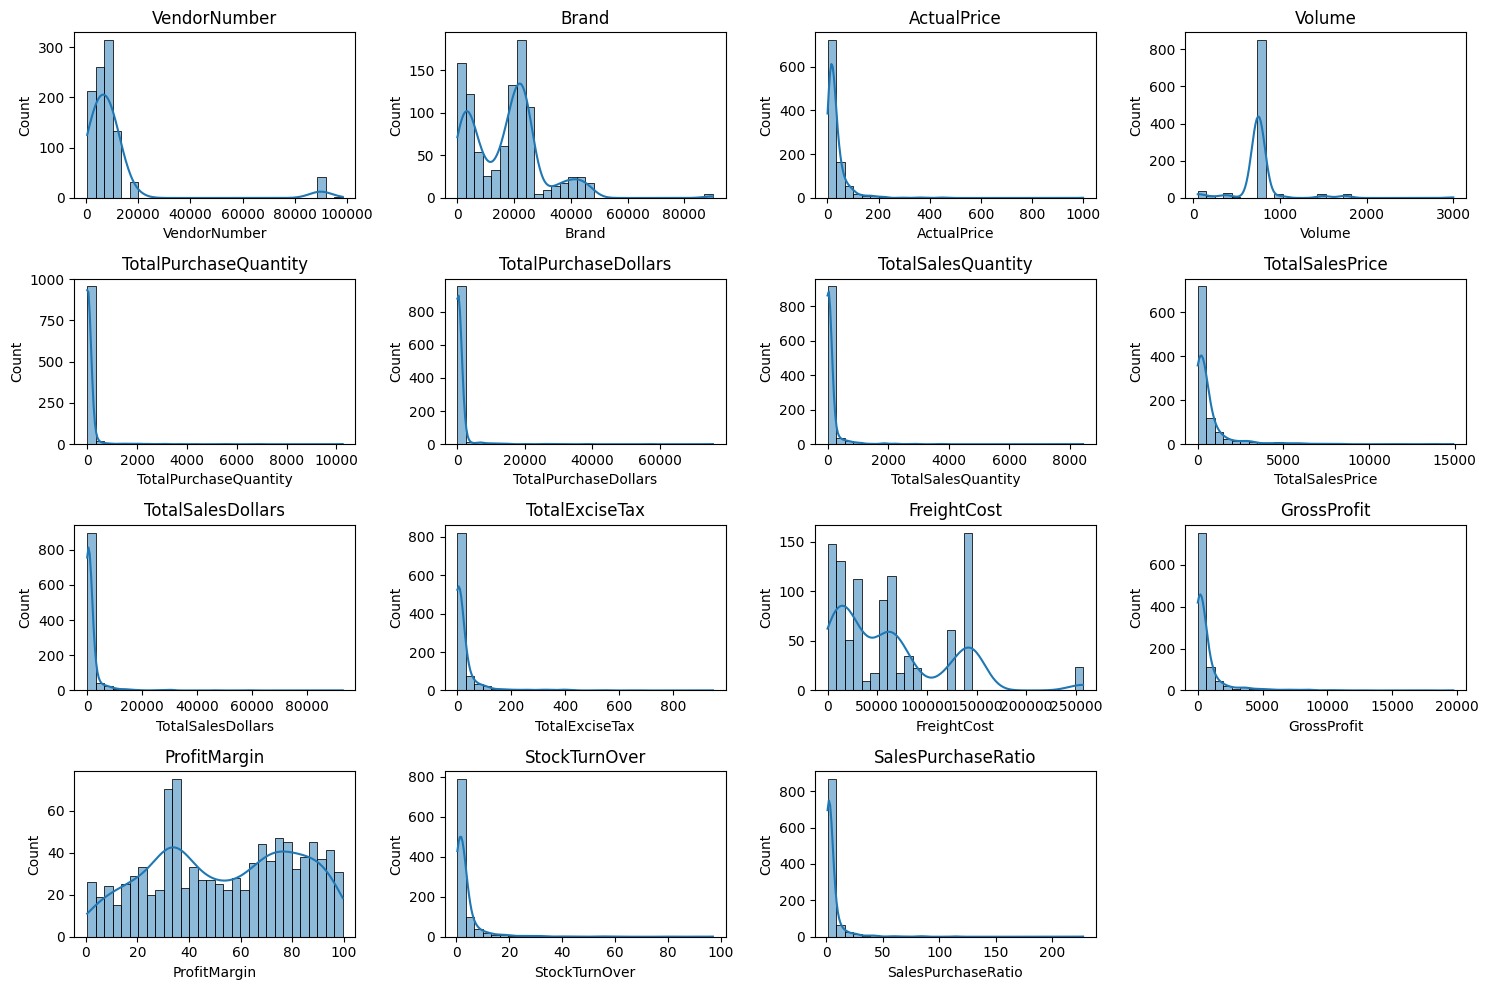

In [8]:
#Dirstibution Plots for Numerical Columns
Numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i , col in enumerate(Numerical_cols):
    plt.subplot(4,4,i+1)  #Adjust grid Layout as needed
    sns.histplot(df[col], kde=True ,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

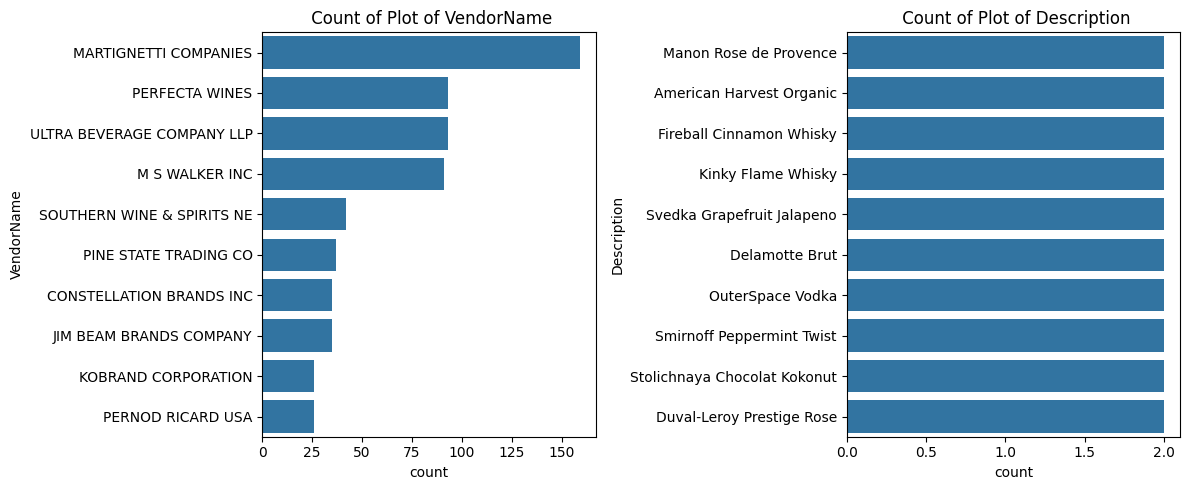

In [9]:
#Count Plots for Categorical Columns
Categorical_cols=["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i,col in enumerate(Categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col] , order=df[col].value_counts().index[:10])  #top 10 categories
    plt.title(f" Count of Plot of {col}")
plt.tight_layout()
plt.show()

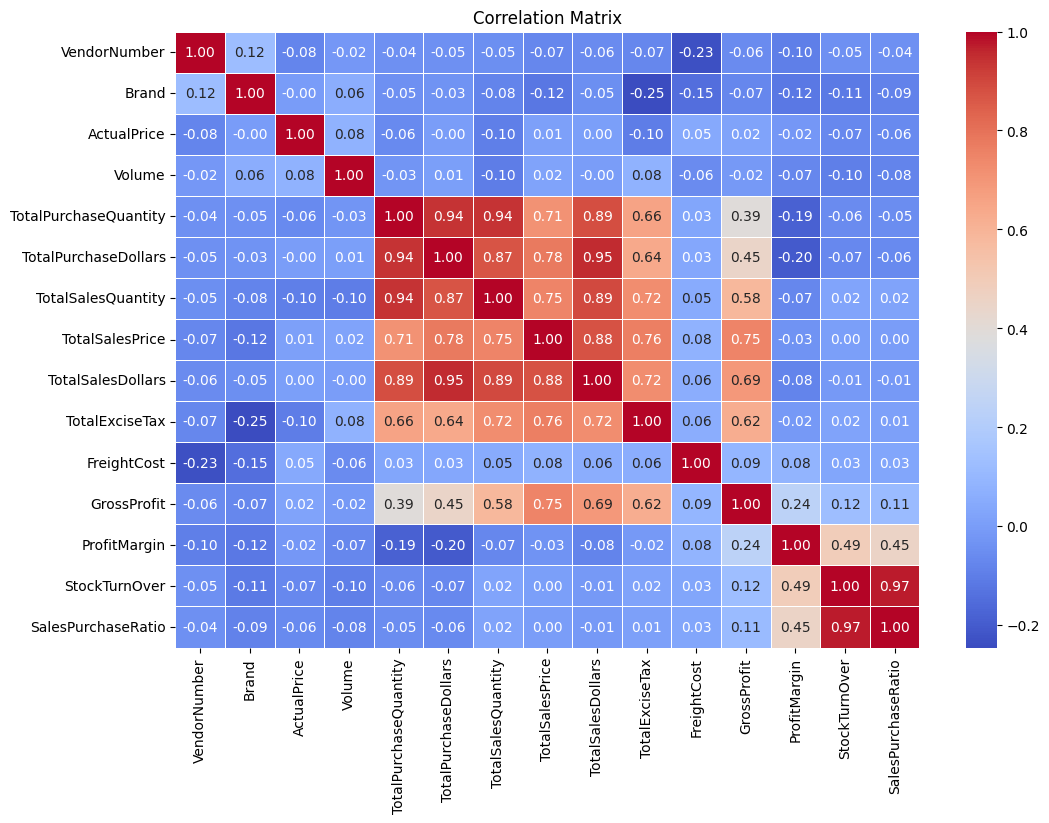

In [10]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_Matrix=df[Numerical_cols].corr()
sns.heatmap(correlation_Matrix, annot=True ,fmt=".2f", cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Matrix")
plt.show()

In [11]:
brand_performance=df.groupby("Description").agg({
    "TotalSalesDollars": 'sum',
    "ProfitMargin":'mean'}).reset_index()

In [12]:
low_sales_threshold = brand_performance["TotalSalesDollars"].quantile(0.15)
high_margin_threshold = brand_performance["ProfitMargin"].quantile(0.85)


In [13]:
low_sales_threshold

np.float64(119.07199999999999)

In [14]:
high_margin_threshold?

Type:        float64
String form: 86.88340345864758
File:        c:\users\ritika\appdata\local\programs\python\python313\lib\site-packages\numpy\__init__.py
Docstring:  
Double-precision floating-point number type, compatible with Python
:class:`float` and C ``double``.

:Character code: ``'d'``
:Canonical name: `numpy.double`
:Alias on this platform (win32 AMD64): `numpy.float64`: 64-bit precision floating-point number type: sign bit, 11 bits exponent, 52 bits mantissa.

In [15]:
#Filter brands with low sales but high profit Margins
target_brands= brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
927,Tracia Syrah,44.94,88.495772
62,Bacardi Oakheart Spiced Trav,59.94,87.554221
273,Chicken & Turkey Cotes du Rh,59.94,90.990991
353,Dr McGillicuddy's Apple Pie,62.72,96.269133
851,St Elder Elderflower Liqueur,63.36,91.035354
326,DeKuyper Buttershots Trav,76.93,90.718835
911,Three Olives Grape Vodka,80.19,99.114603
852,St Germain Liqueur,89.94,87.658439
711,Piehole Apple Pie,98.01,95.592287
626,Mojoshot Blue Lagoon RTD,99.00,90.414141


In [16]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000]  #For better visualization

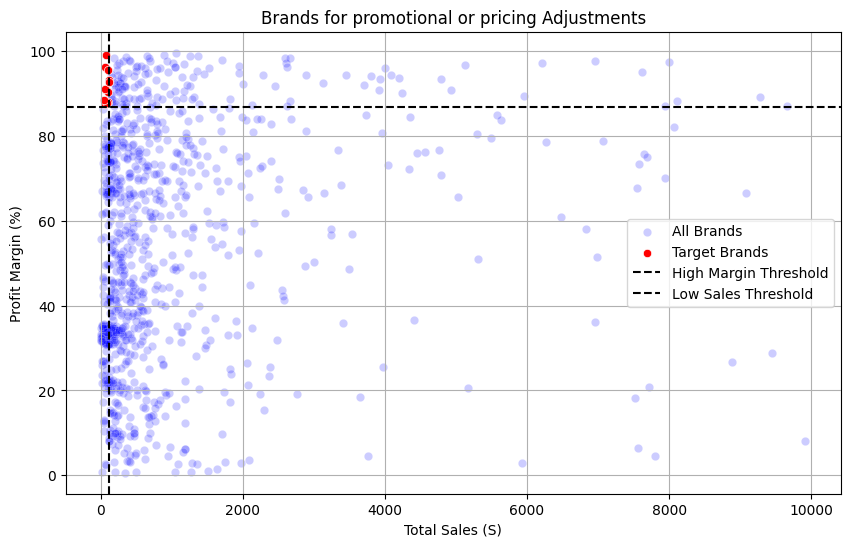

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars',y='ProfitMargin' ,color='blue', label='All Brands' , alpha=0.2)
sns.scatterplot(data=target_brands ,x='TotalSalesDollars',y='ProfitMargin' ,color='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle= '--', color='black' ,label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle= '--', color='black' ,label="Low Sales Threshold")

plt.xlabel("Total Sales (S)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for promotional or pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [113]:
def format_dollars(value):
    if value >= 1_00_000:
        return f"{value/1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [114]:
#Top vendors & Brands by Sales Performance
top_vendors= df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands=df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         319369.23
CONSTELLATION BRANDS INC      212899.92
ULTRA BEVERAGE COMPANY LLP    145276.03
M S WALKER INC                130940.29
PERFECTA WINES                115051.63
BACARDI USA INC                62917.72
BROWN-FORMAN CORP              47848.44
SOUTHERN WINE & SPIRITS NE     40197.10
JIM BEAM BRANDS COMPANY        39474.40
STATE WINE & SPIRITS           37626.63
Name: TotalSalesDollars, dtype: float64

In [115]:
top_brands.apply(lambda x : format_dollars(x))

Description
Simi Chard                      93.13K
J Lohr Seven Oaks Cab Svgn      58.66K
Simi Cab Svgn                   46.36K
Banfi Centine Mntcln Tscna      31.18K
Rodney Strong Cab Svgn          30.89K
Simi Svgn Bl                    29.96K
Ch La Rousseliere St Estephe    29.70K
Buehler Chard RRV               27.20K
H3 Horse Heaven Hills Cab Sv    26.58K
Madison's Ranch Cab Svgn        24.45K
Name: TotalSalesDollars, dtype: object

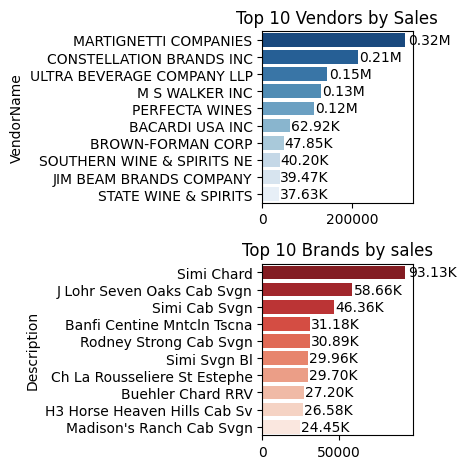

In [116]:
# Plot for top Vendors
plt.subplot(2,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + (bar.get_height() / 2),
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(2,2,3)  
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + (bar.get_height() / 2),
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [117]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance.shape

(72, 4)

In [118]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()

In [119]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)


In [122]:
#To display Top 10 Vendors
Top_Vendors=vendor_performance.head(10)
Top_Vendors['TotalSalesDollars'] = pd.to_numeric(Top_Vendors['TotalSalesDollars'], errors='coerce')
Top_Vendors['TotalPurchaseDollars'] = pd.to_numeric(Top_Vendors['TotalPurchaseDollars'], errors='coerce')
Top_Vendors['GrossProfit'] = pd.to_numeric(Top_Vendors['GrossProfit'], errors='coerce')
Top_Vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
33,MARTIGNETTI COMPANIES,174339.02,145030.21,319369.23,0.20
9,CONSTELLATION BRANDS INC,172011.91,40888.01,212899.92,0.20
41,PERFECTA WINES,65632.59,49419.04,115051.63,0.08
31,M S WALKER INC,59808.21,71132.08,130940.29,0.07
63,ULTRA BEVERAGE COMPANY LLP,55299.40,89976.63,145276.03,0.06
3,BANFI PRODUCTS CORP,32862.65,4137.02,36999.67,0.04
56,STE MICHELLE WINE ESTATES,29449.46,6951.19,36400.65,0.03
2,BACARDI USA INC,23373.94,39543.78,62917.72,0.03
26,JIM BEAM BRANDS COMPANY,17764.45,21709.95,39474.40,0.02
55,STATE WINE & SPIRITS,15806.44,21820.19,37626.63,0.02


In [123]:
Top_Vendors['PurchaseContribution%'].sum()


np.float64(0.7500000000000001)

In [124]:
Top_Vendors['Cumlative_Contribution%']=Top_Vendors['PurchaseContribution%'].cumsum()
Top_Vendors['Cumlative_Contribution%']

33    0.20
9     0.40
41    0.48
31    0.55
63    0.61
3     0.65
56    0.68
2     0.71
26    0.73
55    0.75
Name: Cumlative_Contribution%, dtype: float64

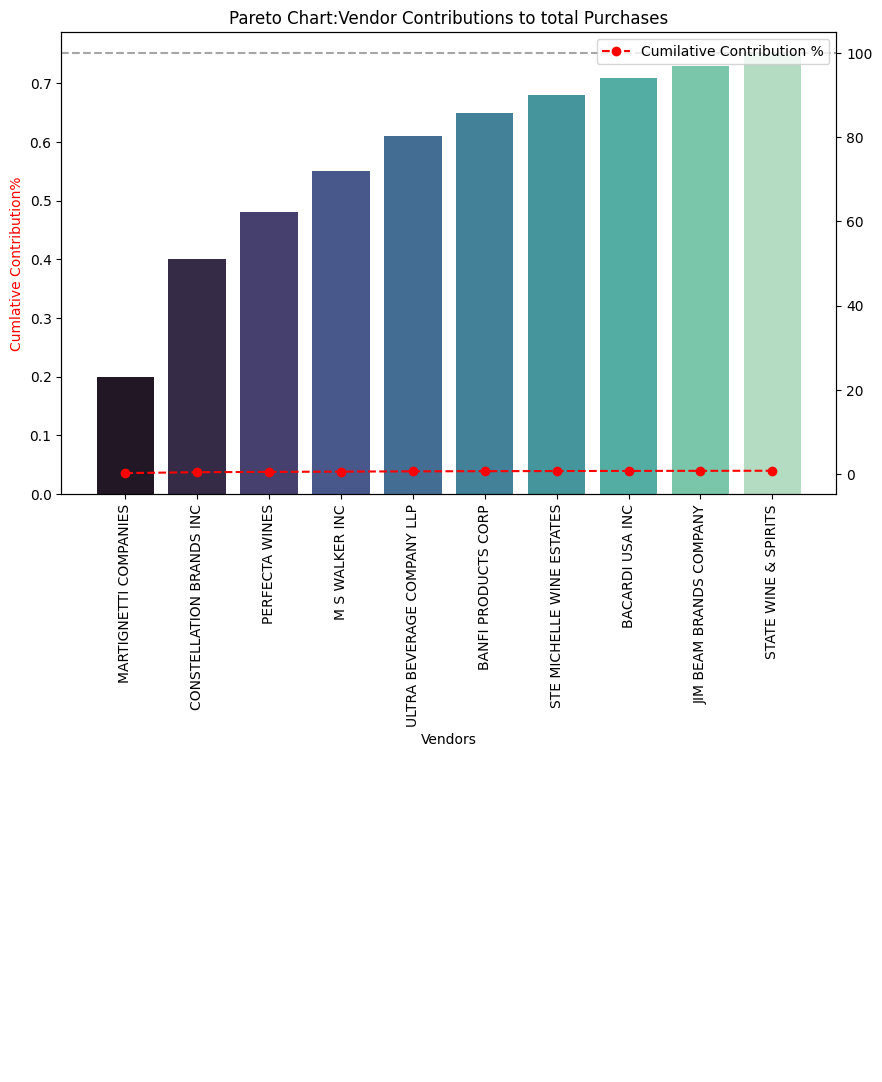

In [125]:
fig,ax1=plt.subplots(figsize=(10,6))

#Bar Plot for Purchase Contribution%
sns.barplot(x=Top_Vendors['VendorName'], y=Top_Vendors['Cumlative_Contribution%'], palette='mako', ax=ax1)

for i,value in enumerate(Top_Vendors['PurchaseContribution%']):
    ax1.text(i,value-1, str(value)+'%', ha='center' , fontsize=10,color='white')


#Line plot for cumlative Contribution
ax2=ax1.twinx()
ax2.plot(Top_Vendors['VendorName'],Top_Vendors['Cumlative_Contribution%'],color='red',marker='o',linestyle='dashed',label='Cumilative Contribution %')

ax1.set_xticklabels(Top_Vendors['VendorName'],rotation=90)
ax1.set_ylabel('Purchase Contribution%',color='blue')
ax1.set_ylabel('Cumlative Contribution%',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart:Vendor Contributions to total Purchases')

ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()



In [126]:
print(f"Total Purhase Contribution of top 10 Vendors is {round(Top_Vendors['PurchaseContribution%'].sum(),2)}%")

Total Purhase Contribution of top 10 Vendors is 0.75%


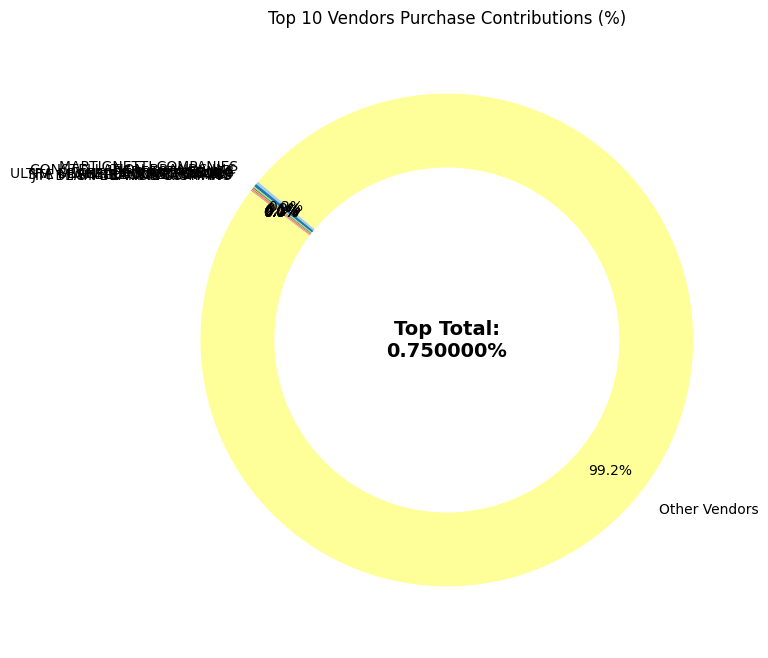

In [128]:
vendors=list(Top_Vendors['VendorName'].values)
Purchase_Contributions=list(Top_Vendors['PurchaseContribution%'].values)
total_Contributions=sum(Purchase_Contributions)
remaining_Contribution=100-total_Contributions

#Append "Other Vendors" Category
vendors.append("Other Vendors")
Purchase_Contributions.append(remaining_Contribution)

#Donut Chart
fig,ax=plt.subplots(figsize=(8,8))
wedges,texts,autotexts=ax.pie(Purchase_Contributions,labels=vendors,autopct='%1.1f%%',
                              startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

#Draw White center
centre_circle=plt.Circle((0,0),0.70, fc='white')
fig.gca().add_artist(centre_circle)

#Add Total Contribution annotation in the center
plt.text(0,0,f'Top Total:\n{total_Contributions:2f}%', fontsize
=14,fontweight='bold',ha='center', va='center')

plt.title("Top 10 Vendors Purchase Contributions (%)")
plt.show()

Text(0, 0, 'Top Total:\n0.750000%')

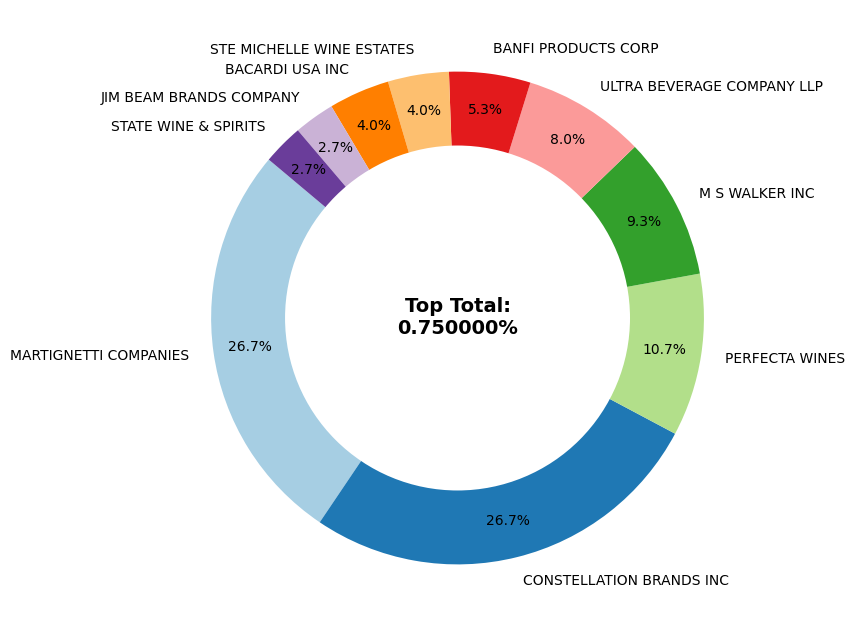

In [129]:
#Top Vendor contribution only
vendors=list(Top_Vendors['VendorName'].values)
Purchase_Contributions=list(Top_Vendors['PurchaseContribution%'].values)
total_Contributions=sum(Purchase_Contributions)


#Donut Chart
fig,ax=plt.subplots(figsize=(8,8))
wedges,texts,autotexts=ax.pie(Purchase_Contributions,labels=vendors,autopct='%1.1f%%',
                              startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

#Draw White center
centre_circle=plt.Circle((0,0),0.70, fc='white')
fig.gca().add_artist(centre_circle)

#Add Total Contribution annotation in the center
plt.text(0,0,f'Top Total:\n{total_Contributions:2f}%', fontsize
=14,fontweight='bold',ha='center', va='center')

In [130]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'ActualPrice',
       'Volume', 'TotalPurchaseQuantity', 'TotalPurchaseDollars',
       'TotalSalesQuantity', 'TotalSalesPrice', 'TotalSalesDollars',
       'TotalExciseTax', 'FreightCost', 'GrossProfit', 'ProfitMargin',
       'StockTurnOver', 'SalesPurchaseRatio'],
      dtype='object')

Text(0, 0, 'Top Total:\n95663.000000%')

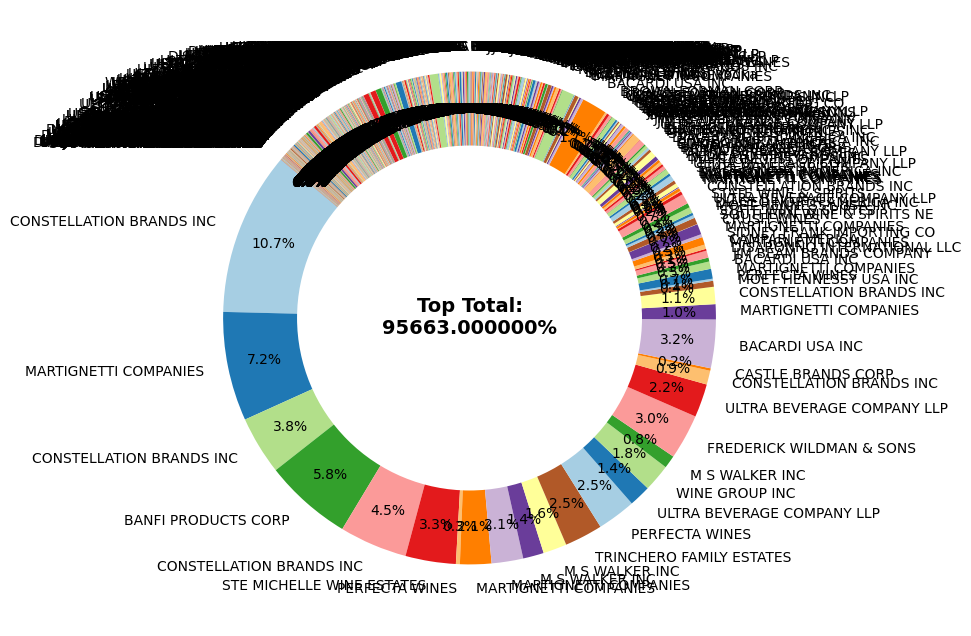

In [131]:
#All vendor Contribution
vendors=df.VendorName.values
Purchase_Contributions=df.TotalPurchaseQuantity.values
total_Contributions=sum(Purchase_Contributions)


#Donut Chart
fig,ax=plt.subplots(figsize=(8,8))
wedges,texts,autotexts=ax.pie(Purchase_Contributions,labels=vendors,autopct='%1.1f%%',
                              startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

#Draw White center
centre_circle=plt.Circle((0,0),0.70, fc='white')
fig.gca().add_artist(centre_circle)

#Add Total Contribution annotation in the center
plt.text(0,0,f'Top Total:\n{total_Contributions:2f}%', fontsize
=14,fontweight='bold',ha='center', va='center')

In [132]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']


In [135]:
#Dividing in quartiles(Buckets)
df['Ordersize']=pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=["Small","Medium","Large"])

In [140]:
df[['Ordersize','TotalPurchaseQuantity']]

,Ordersize,TotalPurchaseQuantity
0,Large,10252.0
1,Large,6846.0
2,Large,3666.0
3,Large,5521.0
4,Large,4258.0
...,...,...
991,Small,1.0
992,Small,2.0
993,Small,6.0
994,Small,1.0


In [142]:
df.groupby('Ordersize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
Ordersize,
Small,35.681652
Medium,20.792296
Large,11.558593


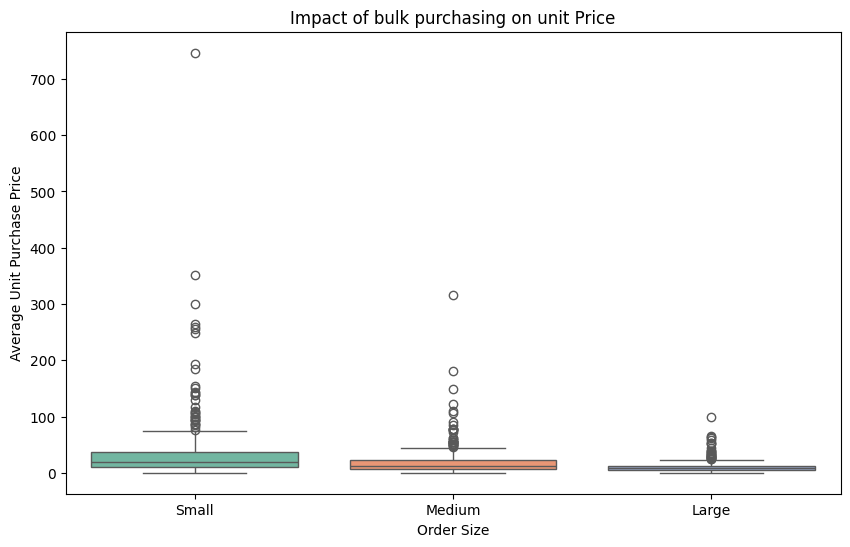

In [146]:
# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df ,x='Ordersize', y='UnitPurchasePrice',palette='Set2')
plt.title('Impact of bulk purchasing on unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

In [159]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver', ascending=True).head(10)

,StockTurnOver
VendorName,
PSP WINES,0.583333
PALM BAY INTERNATIONAL INC,0.666667
FREDERICK WILDMAN & SONS,0.683301
E & J GALLO WINERY,0.687520
VINEYARD BRANDS INC,0.702005
TREASURY WINE ESTATES,0.705882
STE MICHELLE WINE ESTATES,0.714761
TRINCHERO FAMILY ESTATES,0.722393
SIDNEY FRANK IMPORTING CO,0.728778


In [162]:
df['UnsoldInventoryValue']=(df['TotalPurchaseQuantity'])*df['UnitPurchasePrice']
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 0.85M


In [165]:
#Aggregate Capital Locked per Vnedor
Inventory_Value_per_Vendor=df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

#Sort Vendors with highest Locked Capital
Inventory_Value_per_Vendor=Inventory_Value_per_Vendor.sort_values(by='UnsoldInventoryValue',ascending=False)
Inventory_Value_per_Vendor['UnsoldInventoryValue']=Inventory_Value_per_Vendor['UnsoldInventoryValue'].apply(format_dollars)
Inventory_Value_per_Vendor.head(10)

,VendorName,UnsoldInventoryValue
33,MARTIGNETTI COMPANIES,0.17M
9,CONSTELLATION BRANDS INC,0.17M
41,PERFECTA WINES,65.63K
31,M S WALKER INC,59.81K
63,ULTRA BEVERAGE COMPANY LLP,55.30K
3,BANFI PRODUCTS CORP,32.86K
56,STE MICHELLE WINE ESTATES,29.45K
2,BACARDI USA INC,23.37K
26,JIM BEAM BRANDS COMPANY,17.76K
55,STATE WINE & SPIRITS,15.81K


In [274]:
top_Vendors 

,VendorNumber,VendorName,Brand,Description,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio,UnitPurchasePrice,Ordersize,UnsoldInventoryValue
0,1392.0,CONSTELLATION BRANDS INC,6650.0,Simi Chard,14.99,750.0,10252.0,75659.76,8445.0,13391.96,93130.55,948.35,79528.99,17470.79,18.759462,0.823742,1.230913,7.38,Large,75659.76
1,4425.0,MARTIGNETTI COMPANIES,6983.0,J Lohr Seven Oaks Cab Svgn,11.99,750.0,6846.0,56616.42,3673.0,14909.67,58659.27,411.54,144929.24,2042.85,3.482570,0.536518,1.036082,8.27,Large,56616.42
2,1392.0,CONSTELLATION BRANDS INC,22143.0,Simi Cab Svgn,18.99,750.0,3666.0,38566.32,2880.0,13565.62,46362.20,322.44,79528.99,7795.88,16.815164,0.785597,1.202142,10.52,Large,38566.32
3,516.0,BANFI PRODUCTS CORP,18152.0,Banfi Centine Mntcln Tscna,10.99,750.0,5521.0,29040.46,3841.0,7363.90,31178.59,430.59,8510.41,2138.13,6.857687,0.695707,1.073626,5.26,Large,29040.46
4,1392.0,CONSTELLATION BRANDS INC,22899.0,Simi Svgn Bl,14.99,750.0,4258.0,27804.74,2965.0,8136.97,29957.35,332.40,79528.99,2152.61,7.185582,0.696336,1.077419,6.53,Large,27804.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,3960.0,DIAGEO NORTH AMERICA INC,381.0,Baileys Irish Cream w/4 Glss,21.99,750.0,3.0,43.50,130.0,930.53,2588.70,102.39,257032.07,2545.20,98.319620,43.333333,59.510345,14.50,Small,43.50
822,480.0,BACARDI USA INC,1020.0,B & B Dom VAP,28.99,750.0,2.0,36.22,47.0,824.67,1174.53,37.06,89286.27,1138.31,96.916213,23.500000,32.427664,18.11,Small,36.22
824,4425.0,MARTIGNETTI COMPANIES,24992.0,Buglioni L'Amarone,54.99,750.0,1.0,36.18,31.0,1099.80,1704.69,3.44,144929.24,1668.51,97.877620,31.000000,47.116915,36.18,Small,36.18
930,6785.0,PALM BAY INTERNATIONAL INC,25204.0,Ch Rollan de By Medoc,24.99,750.0,1.0,17.00,55.0,624.75,1374.45,6.13,13605.41,1357.45,98.763142,55.000000,80.850000,17.00,Small,17.00


In [275]:
low_Vendors

,VendorNumber,VendorName,Brand,Description,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesPurchaseRatio,UnitPurchasePrice,Ordersize,UnsoldInventoryValue
511,10754.0,PERFECTA WINES,23962.0,Enzo Boglietti Dolcetto Alba,18.99,750.0,12.0,151.92,8.0,142.93,163.92,0.88,28720.52,12.00,7.320644,0.666667,1.078989,12.66,Medium,151.92
519,7749.0,R.P.IMPORTS INC,19603.0,Ch Jean De Gue Lalande 10,42.99,750.0,5.0,146.20,4.0,85.98,171.96,0.44,91.50,25.76,14.980228,0.800000,1.176197,29.24,Small,146.20
538,7245.0,PROXIMO SPIRITS INC.,3765.0,Three Olives Citrus Vodka,12.99,750.0,15.0,140.55,12.0,164.89,179.88,9.47,38994.78,39.33,21.864576,0.800000,1.279829,9.37,Medium,140.55
539,4425.0,MARTIGNETTI COMPANIES,4556.0,Austin Cocktails Vodkarita,14.99,750.0,12.0,140.52,11.0,149.90,164.89,8.68,144929.24,24.37,14.779550,0.916667,1.173427,11.71,Medium,140.52
542,7245.0,PROXIMO SPIRITS INC.,3187.0,Three Olives Cake Vodka,10.99,750.0,16.0,139.52,12.0,59.96,179.88,9.45,38994.78,40.36,22.437180,0.750000,1.289278,8.72,Medium,139.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,4425.0,MARTIGNETTI COMPANIES,27934.0,Terruzzi & Puthod Vernaccia,4.99,750.0,1.0,3.37,1.0,4.99,4.99,0.11,144929.24,1.62,32.464930,1.000000,1.480712,3.37,Small,3.37
992,9815.0,WINE GROUP INC,8527.0,Concannon Glen Ellen Wh Zin,4.99,750.0,2.0,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.261364,1.32,Small,2.64
993,8004.0,SAZERAC CO INC,5683.0,Dr McGillicuddy's Apple Pie,0.49,50.0,6.0,2.34,128.0,0.98,62.72,6.72,50293.62,60.38,96.269133,21.333333,26.803419,0.39,Small,2.34
994,9815.0,WINE GROUP INC,22407.0,Three Wishes Chard,3.29,750.0,1.0,2.25,1.0,3.29,3.29,0.11,27100.41,1.04,31.610942,1.000000,1.462222,2.25,Small,2.25


Top Vendors 95% CI: (54.48, 61.98), Mean: 58.23
Low Vendors 95% CI: (44.66, 50.74), Mean: 47.70


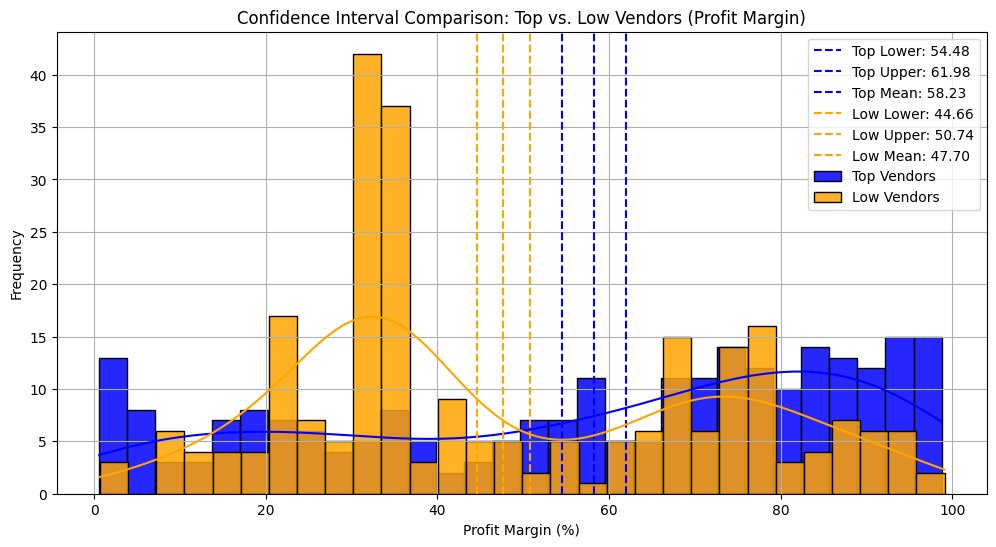

In [280]:


#  df is DataFrame and 'ProfitMargin' & 'TotalSalesDollars' columns exist

# Calculate thresholds
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

# Filter vendors and drop rows with NaN in 'ProfitMargin'
top_Vendors = df[(df['TotalSalesDollars'] >= top_threshold)].dropna(subset=['ProfitMargin'])
low_Vendors = df[(df['TotalSalesDollars'] <= low_threshold)].dropna(subset=['ProfitMargin'])

# Confidence interval function expects numeric data (1D array or Series)
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

# Calculate confidence intervals using 'ProfitMargin' column only
top_mean, top_lower, top_upper = confidence_interval(top_Vendors['ProfitMargin'])
low_mean, low_lower, low_upper = confidence_interval(low_Vendors['ProfitMargin'])

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plotting
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_Vendors['ProfitMargin'], kde=True, color="blue", bins=30, alpha=0.85, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_Vendors['ProfitMargin'], kde=True, color="orange", bins=30, alpha=0.85, label="Low Vendors")
plt.axvline(low_lower, color="orange", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="orange", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="orange", linestyle="--", label=f"Low Mean: {low_mean:.2f}")

# Finalize plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [285]:
from scipy.stats import ttest_ind

top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_Vendors = df[(df['TotalSalesDollars'] >= top_threshold)].dropna(subset=['ProfitMargin'])
low_Vendors = df[(df['TotalSalesDollars'] <= low_threshold)].dropna(subset=['ProfitMargin'])

# Perform Two-Sample T-Test on the 'ProfitMargin' column
t_stat, p_value = ttest_ind(top_Vendors['ProfitMargin'], low_Vendors['ProfitMargin'], equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject Ho: No significant difference in profit margins.")


T-Statistic: 4.2923, P-Value: 0.0000
Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.
